GEDE BAGUS RAKA NEGARA
202331142

In [1]:
import pandas as pd

dataset = pd.read_csv("K03_counter_strike_2.csv")
dataset

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,t_helmets,round_winner
0,175.00,0.0,0.0,de_dust2,False,500.0,500.0,0.0,0.0,4000.0,4000.0,0.0,0.0,CT
1,156.03,0.0,0.0,de_dust2,False,500.0,500.0,400.0,300.0,600.0,650.0,0.0,0.0,CT
2,96.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,500.0,0.0,0.0,CT
3,76.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,500.0,0.0,0.0,CT
4,174.97,1.0,0.0,de_dust2,False,500.0,500.0,192.0,0.0,18350.0,10750.0,0.0,0.0,CT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,74.90,7.0,10.0,de_train,False,327.0,355.0,376.0,183.0,6350.0,13300.0,3.0,1.0,T
1996,31.23,7.0,10.0,de_train,True,227.0,152.0,276.0,183.0,5000.0,7900.0,2.0,1.0,T
1997,11.23,7.0,10.0,de_train,True,185.0,105.0,266.0,183.0,5300.0,4450.0,2.0,1.0,T
1998,174.91,7.0,11.0,de_train,False,500.0,500.0,55.0,0.0,14900.0,32000.0,0.0,0.0,T


Penjelasannya : Membaca file CSV ke dalam DataFrame dataset dan menampilkan data.

In [2]:
dataset.head()

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,t_helmets,round_winner
0,175.00,0.0,0.0,de_dust2,False,500.0,500.0,0.0,0.0,4000.0,4000.0,0.0,0.0,CT
1,156.03,0.0,0.0,de_dust2,False,500.0,500.0,400.0,300.0,600.0,650.0,0.0,0.0,CT
2,96.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,500.0,0.0,0.0,CT
3,76.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,500.0,0.0,0.0,CT
4,174.97,1.0,0.0,de_dust2,False,500.0,500.0,192.0,0.0,18350.0,10750.0,0.0,0.0,CT


Penjelasannya : Menampilkan lima baris pertama dari dataset untuk melihat contoh data.

In [3]:
dataset['round_winner_numeric'] = dataset['round_winner'].apply(lambda x: 1 if x == 'CT' else 0)

numeric_dataset = dataset.select_dtypes(include=['number'])
correlation_matrix = numeric_dataset.corr()

round_winner_corr = correlation_matrix['round_winner_numeric'].sort_values(ascending=False)
round_winner_corr


round_winner_numeric    1.000000
ct_armor                0.287202
ct_health               0.179124
ct_helmets              0.176949
time_left               0.067969
ct_money                0.060516
ct_score               -0.049241
t_health               -0.100385
t_score                -0.104440
t_money                -0.174663
t_armor                -0.355966
t_helmets              -0.375586
Name: round_winner_numeric, dtype: float64

Penjelasannya : Menambahkan kolom round_winner_numeric dengan nilai 1 jika pemenang ‘CT’, atau 0 jika bukan. Serta, Menghitung korelasi antara round_winner_numeric dan fitur numerik lainnya, disusun berdasarkan kekuatan korelasi.

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix

features = ['ct_armor', 'ct_health', 'ct_helmets']
X = dataset[features]
y = dataset['round_winner_numeric']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


Penjelasannya : Memisahkan fitur ke X dan label ke y, lalu membagi menjadi data latih (70%) dan uji (30%).

In [16]:
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

Penjelasannya : Melatih model SVM dengan kernel linear menggunakan data latih X_train dan y_train.

In [17]:
y_pred = svm_model.predict(X_test)

In [18]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.6333333333333333

Penjelasan : Memperoleh prediksi dari X_test dan menghitung akurasi dengan data uji.

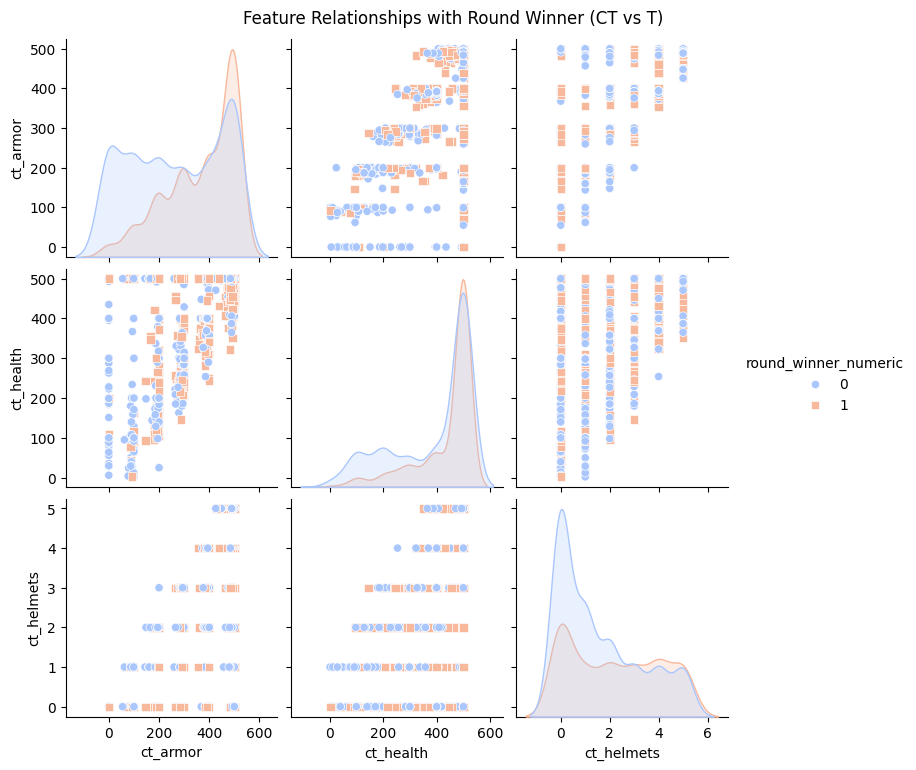

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

visualization_data = dataset[features + ['round_winner_numeric']]

sns.pairplot(visualization_data, hue='round_winner_numeric', palette='coolwarm', markers=['o', 's'])
plt.suptitle("Feature Relationships with Round Winner (CT vs T)", y=1.02)
plt.show()


Penjelasannya : Membuat visualisasi pasangan fitur untuk melihat hubungan fitur-fitur terhadap round_winner_numeric.

In [20]:
df_filtered = dataset[['ct_armor', 'ct_health', 'ct_helmets' ,'round_winner_numeric']].copy()
df_filtered.dropna(inplace=True)
#df_filtered['gender'] = df_filtered['gender'].map({'Female': 0, 'Male': 1})
df_filtered.head()


,ct_armor,ct_health,ct_helmets,round_winner_numeric
0,0.0,500.0,0.0,1
1,400.0,500.0,0.0,1
2,294.0,391.0,0.0,1
3,294.0,391.0,0.0,1
4,192.0,500.0,0.0,1


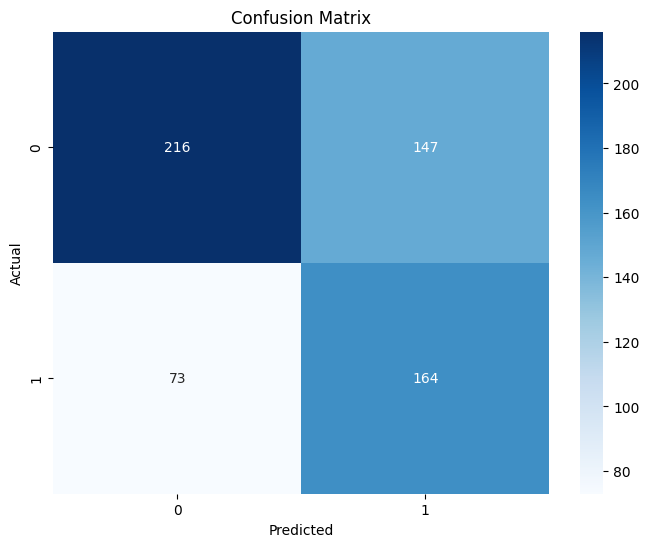

0.6333333333333333

In [21]:
df_filtered.dropna(inplace=True)
X_train, X_test, y_train, y_test = train_test_split(df_filtered[['ct_armor', 'ct_health', 'ct_helmets']], df_filtered['round_winner_numeric'], test_size=0.3, random_state=42)
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

accuracy


Penjelasannya : Kode ini melatih model SVM untuk memprediksi pemenang putaran dengan fitur 
`ct_armor`, `ct_health`, dan `ct_helmets`. Setelah menghapus data null, data dibagi menjadi train dan test. 
Model dilatih, prediksi dilakukan, lalu akurasi dihitung. Matriks kebingungan divisualisasikan sebagai heatmap untuk menunjukkan prediksi benar dan salah.